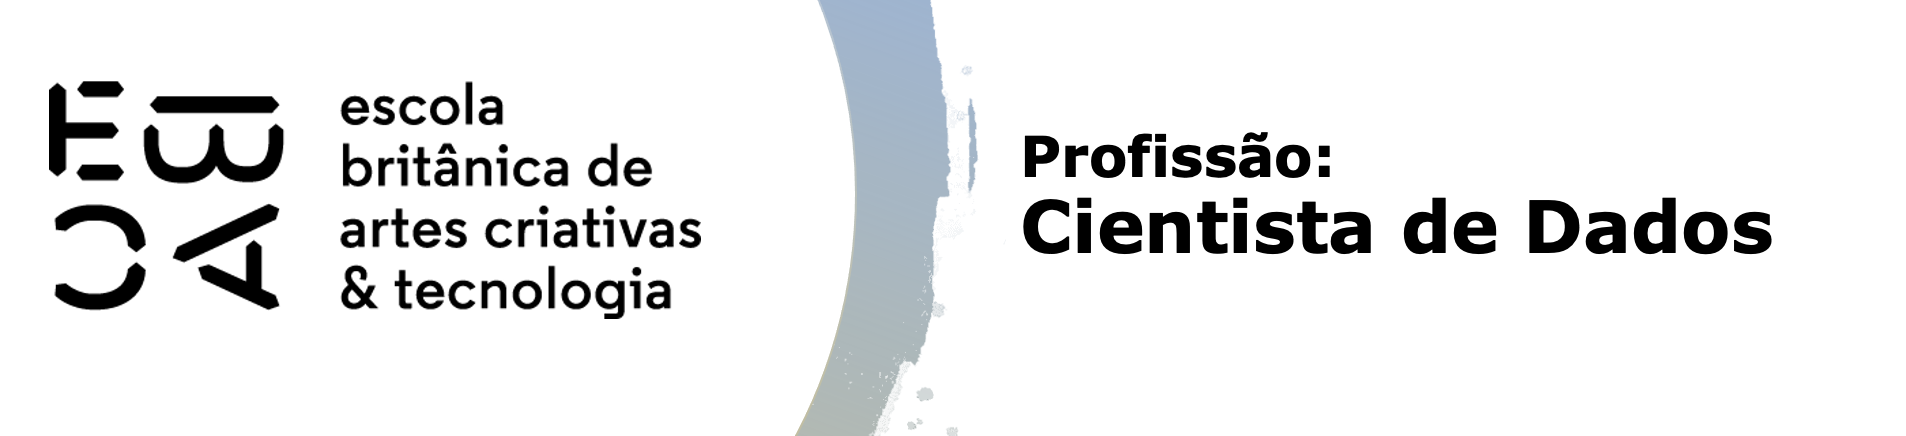

**Aluno: Marcelo Aires**

# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

## a) Obtenha a média e a diferença através de uma multiplicação matricial.

In [2]:
def transf_lin(m,
               x = df["p1"],
               y = df["p2"],
               label1 = 'originais',
               label2 = 'rotação'):

    #Definindo figura e configurando eixos
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    xmin = -5
    xmax = 21
    ymin = -5
    ymax = 15

    # ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

    # Vetores coluna da matriz de transformação
    ax.arrow(0, 0, m[0,0], m[1,0]
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g', 
             length_includes_head=True)

    ax.arrow(0, 0, m[0,1], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)


    #linhas horizontais e verticais de referência
    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    #Transformação linear
    df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

    # Plotar os dados originais
    plt.scatter(x, y, label=label1)

    # Plotar os dados transformados
    plt.scatter(df_rot[0,:], df_rot[1,:], label=label2)

    #Legenda
    plt.legend(loc='lower right')
    
    return df_rot

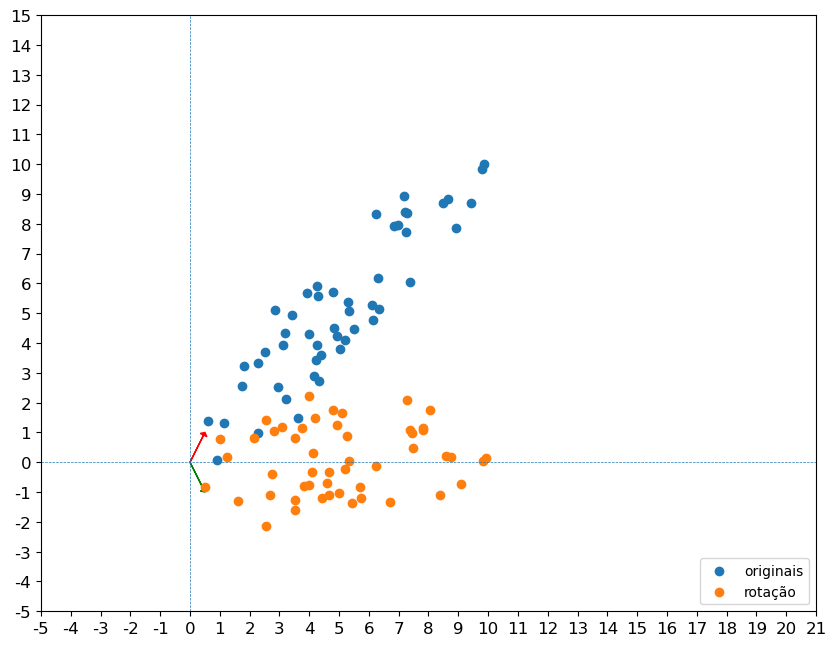

In [3]:
t = np.array([[ 0.5, 0.5],
              [ -1, 1]])
media, evolucao = transf_lin(t)

In [4]:
df['Média'] = media
df['Evolução'] = evolucao
df.head()

p1        p2     Média  Evolução
0  6.964692  7.943428  7.454060  0.978736
1  2.861393  5.099537  3.980465  2.238143
2  2.268515  0.974429  1.621472 -1.294085
3  5.513148  4.474359  4.993754 -1.038788
4  7.194690  8.938402  8.066546  1.743712

## b) Calcule a correlação entre os dados da p1 e p2

In [5]:
p1_p2 = df[['p1', 'p2']].corr(numeric_only=True)
p1_p2

p1        p2
p1  1.000000  0.895737
p2  0.895737  1.000000

<Axes: >

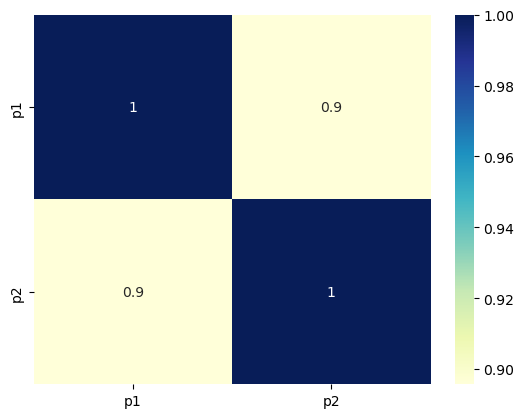

In [6]:
sns.heatmap(p1_p2, annot=True, cmap="YlGnBu")

## c) Calcule a correlação entre os dados transformados (média e diferença)

In [7]:
med_evo = df[['Média', 'Evolução']].corr(numeric_only=True)
med_evo

Média  Evolução
Média     1.000000  0.133474
Evolução  0.133474  1.000000

<Axes: >

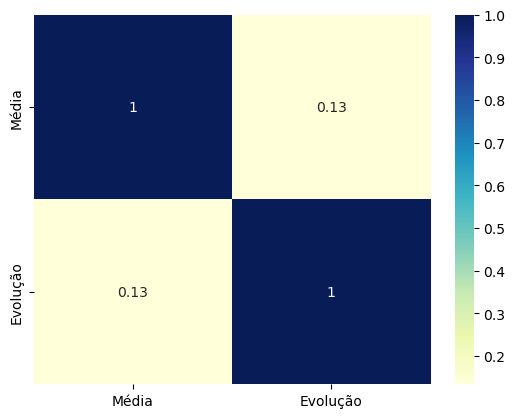

In [8]:
sns.heatmap(med_evo, annot=True, cmap="YlGnBu")

## d) Comente as correlações observadas.

A correlação entre as notas **p1** e **p2** é alta, o que indica que a evolução, ou seja, a diferença entre p1 e p2 são baixas. Isso mostra que quando a nota p1 é alta, geralmente a nota p2 também será.

Já a correlação entre a **média** e a **evolução**, não se correlacionam, a evolução entre os alunos variam pouco. Já a média dos alunos variam muito mais.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

**Resposta:** Claramente a imagem da *"Média x Evolução"* fica esticada na horizontal, pois a média é metade da soma de p1 e p2, já a soma é somente a soma.

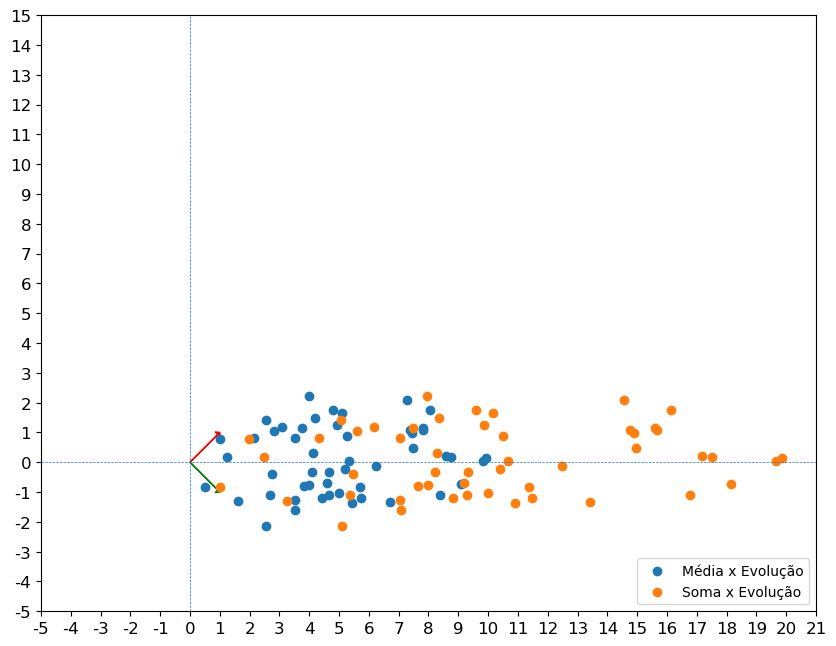

In [9]:
m = np.array([[ 1, 1],
              [ -1, 1]])
soma, evolucao = transf_lin(m, df['Média'], df['Evolução'], label1="Média x Evolução", label2="Soma x Evolução")

In [10]:
df['Soma'] = soma
df.head()

p1        p2     Média  Evolução       Soma
0  6.964692  7.943428  7.454060  0.978736  14.908120
1  2.861393  5.099537  3.980465  2.238143   7.960930
2  2.268515  0.974429  1.621472 -1.294085   3.242944
3  5.513148  4.474359  4.993754 -1.038788   9.987507
4  7.194690  8.938402  8.066546  1.743712  16.133092